In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\Alberto\Documents\AI Python course\Python\Machine learning\Wine\wine.csv')

In [2]:
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import (accuracy_score, classification_report,ConfusionMatrixDisplay,
                             confusion_matrix, SCORERS)

In [26]:
def give_f_imp(model, X_train):

    f_importance = pd.DataFrame({'feature_names': X_train.columns,
                                 'importance': model.feature_importances_})
    display(f_importance)

    plt.figure(figsize=(8, 5))
    plt.title('Feature importance')
    sns.barplot(data=f_importance, x='feature_names', y='importance')
    plt.xticks(rotation='vertical')
    plt.show()
    pass

def give_learning_curve(model,X_train,y_train, scoring= 'f1_macro'):
    n, train_score, val_score = learning_curve(model, 
                                               X_train, 
                                               y_train,
                                               cv=5, 
                                               train_sizes=np.linspace(0.1, 1, 10), 
                                               scoring=scoring)

    lc = pd.DataFrame({'n': n,
                      'train score': train_score.mean(axis=1),
                      'test score': val_score.mean(axis=1)})
    display(lc)
    # plot:
    
    plt.figure(figsize=(8, 5))
    plt.title('Learning Curve')
    
    plt.plot(n, train_score.mean(axis=1), label='train score', color='orange')
    plt.plot(n, val_score.mean(axis=1), label='test score', color='green')
    
    plt.xlabel('n rows')
    plt.ylabel(scoring)
    plt.ylim([0,1.1])
    plt.legend()
    plt.show()
    pass

def give_confusion_report(model,X_test,y_test):
    
    pred_test = model.predict(X_test)
    cm = confusion_matrix(y_test, pred_test)
    
    CM = ConfusionMatrixDisplay(confusion_matrix=cm)
    CM.plot()
    plt.show()
    
    print(classification_report(y_test,pred_test))


**Preprocessing**

In [4]:
X = df.copy()
y = X.pop('target')
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.65, # 0.25 
                                                    random_state=42)

In [5]:
print(X_train.shape)
X_test.shape

(62, 13)


(116, 13)

In [15]:
X_train = X_train[['alcalinity_of_ash', 'flavanoids', 'hue']]
X_test = X_test[['alcalinity_of_ash', 'flavanoids', 'hue']]

**Fit, max_depth = 2**

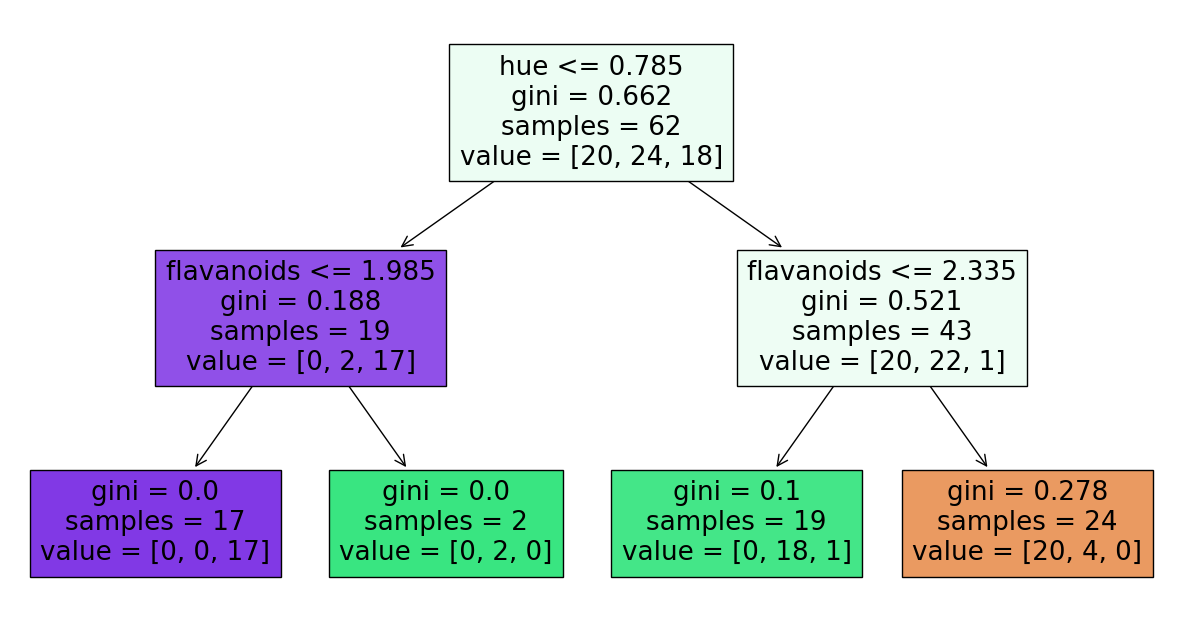

In [17]:
model = DecisionTreeClassifier(max_depth = 2) 
model.fit(X_train,y_train)

plt.figure(figsize=(15, 8))

plot_tree(model,
          feature_names=X_train.columns,
          filled=True)
plt.show()

,feature_names,importance
0,alcalinity_of_ash,0.000000
1,flavanoids,0.536978
2,hue,0.463022


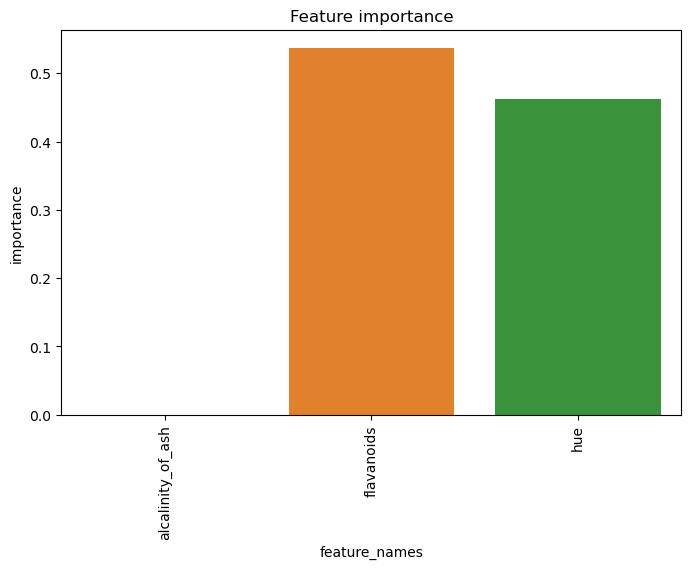

In [20]:
give_f_imp(model,X_train)

In [22]:
y_pred = model.predict(X_test)

score = accuracy_score(y_test,y_pred)
print(score)

0.8189655172413793


,n,train score,test score
0,4,1.000000,0.630769
1,9,1.000000,0.634615
2,14,0.900000,0.679487
3,19,0.894737,0.775641
4,24,0.941667,0.792308
5,29,0.951724,0.776923
6,34,0.917647,0.760256
7,39,0.933333,0.823077
8,44,0.927273,0.855128
9,49,0.922449,0.808974


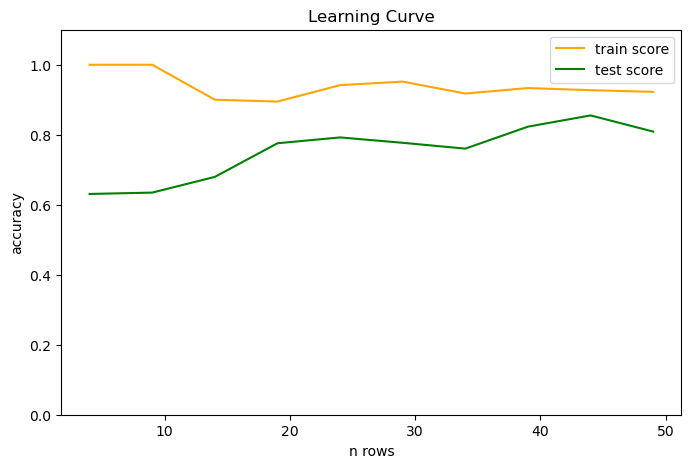

In [24]:
give_learning_curve(model, X_train,y_train, scoring='accuracy')

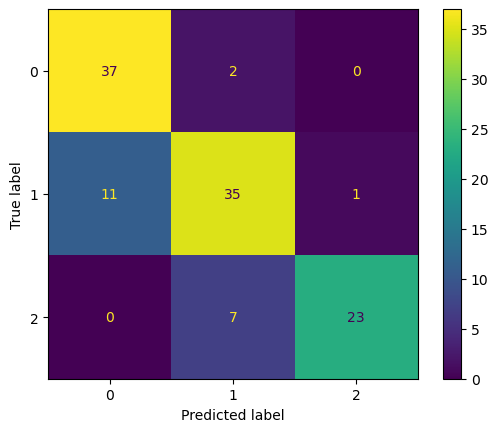

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        39
           1       0.80      0.74      0.77        47
           2       0.96      0.77      0.85        30

    accuracy                           0.82       116
   macro avg       0.84      0.82      0.82       116
weighted avg       0.83      0.82      0.82       116



In [27]:
give_confusion_report(model,X_test,y_test)

**With gridsearchCV**

In [28]:
params = {'max_depth':np.arange(1,5)
          ,'min_samples_leaf':np.arange(2,10,3)}

scoring = 'accuracy'

grid = GridSearchCV(DecisionTreeClassifier()
                    ,param_grid=params
                    ,scoring=scoring)

grid.fit(X_train,y_train)

model = grid.best_estimator_
score = grid.best_score_

In [29]:
display(model)
print('score=',score)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

score= 0.8256410256410256


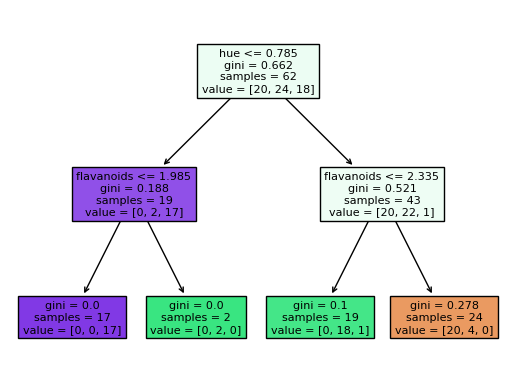

In [30]:
plot_tree(model,
          feature_names=X_train.columns,
          filled=True)
plt.show()

,feature_names,importance
0,alcalinity_of_ash,0.000000
1,flavanoids,0.536978
2,hue,0.463022


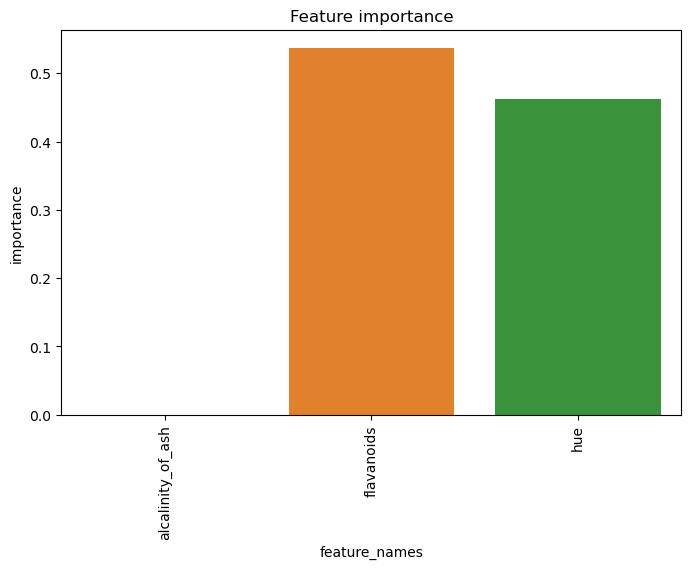

In [31]:
give_f_imp(model,X_train)

,n,train score,test score
0,4,0.800000,0.533333
1,9,0.800000,0.535897
2,14,0.900000,0.679487
3,19,0.894737,0.714103
4,24,0.941667,0.792308
5,29,0.951724,0.776923
6,34,0.917647,0.760256
7,39,0.933333,0.823077
8,44,0.927273,0.855128
9,49,0.922449,0.808974


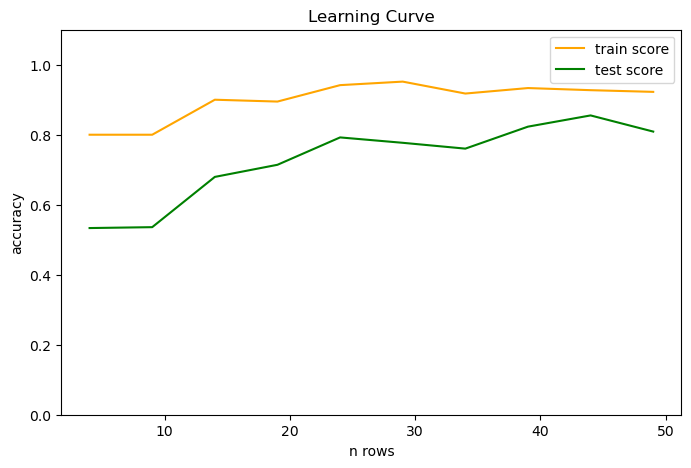

In [32]:
give_learning_curve(model,X_train,y_train,scoring=scoring)

**Random forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [71]:
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
RandomForestClassifier()
y_pred = clf.predict(X_test)


In [72]:
sum(y_pred == y_test)/len(y_pred)
#also: score = accuracy_score(y_test,y_pred)
print(score)

0.8897435897435898


,feature_names,importance
0,alcalinity_of_ash,0.258656
1,flavanoids,0.359839
2,hue,0.381505


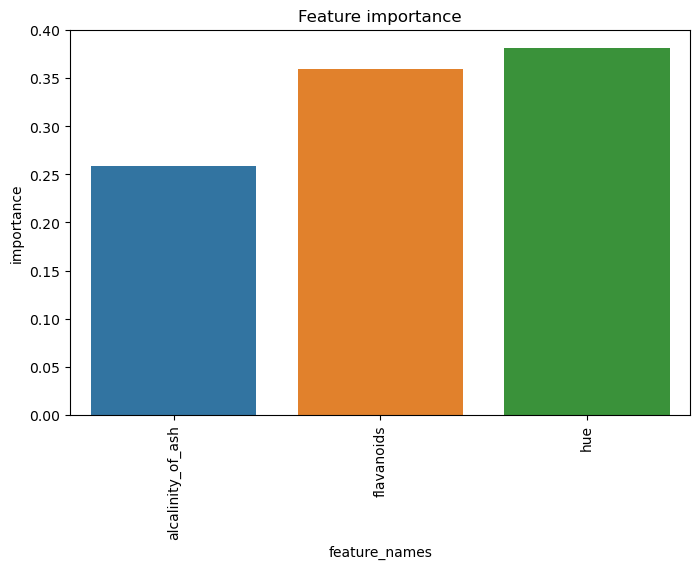

In [73]:
give_f_imp(model,X_train)

,n,train score,test score
0,4,1.000000,0.600000
1,9,1.000000,0.647436
2,14,1.000000,0.646154
3,19,0.968421,0.793590
4,24,0.983333,0.825641
5,29,0.972414,0.843590
6,34,0.970588,0.874359
7,39,0.953846,0.842308
8,44,0.950000,0.874359
9,49,0.934694,0.857692


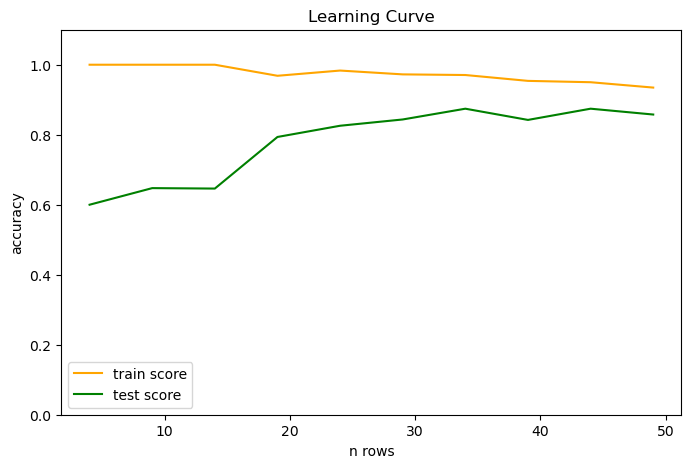

In [74]:
give_learning_curve(clf, X_train,y_train, scoring='accuracy')

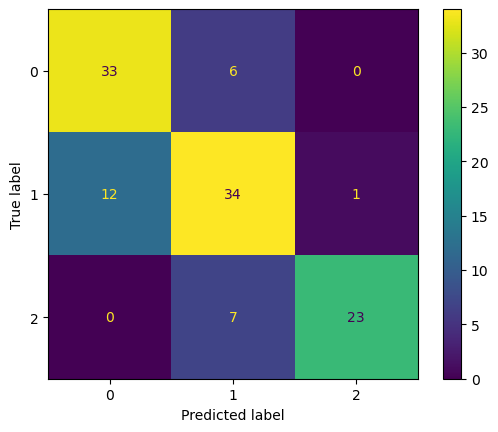

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        39
           1       0.72      0.72      0.72        47
           2       0.96      0.77      0.85        30

    accuracy                           0.78       116
   macro avg       0.81      0.78      0.79       116
weighted avg       0.79      0.78      0.78       116



In [75]:
give_confusion_report(clf,X_test,y_test)

**With gridsearch CV**

In [58]:
params = {'max_depth':np.arange(1,6)
          ,'min_samples_leaf':np.arange(2,10,3)}

scoring = 'accuracy'

grid = GridSearchCV(RandomForestClassifier()
                    ,param_grid=params
                    ,scoring=scoring)

grid.fit(X_train,y_train)

model = grid.best_estimator_
score = grid.best_score_

In [59]:

display(model)
print(score)


RandomForestClassifier(max_depth=5, min_samples_leaf=2)

0.8897435897435898


,feature_names,importance
0,alcalinity_of_ash,0.258656
1,flavanoids,0.359839
2,hue,0.381505


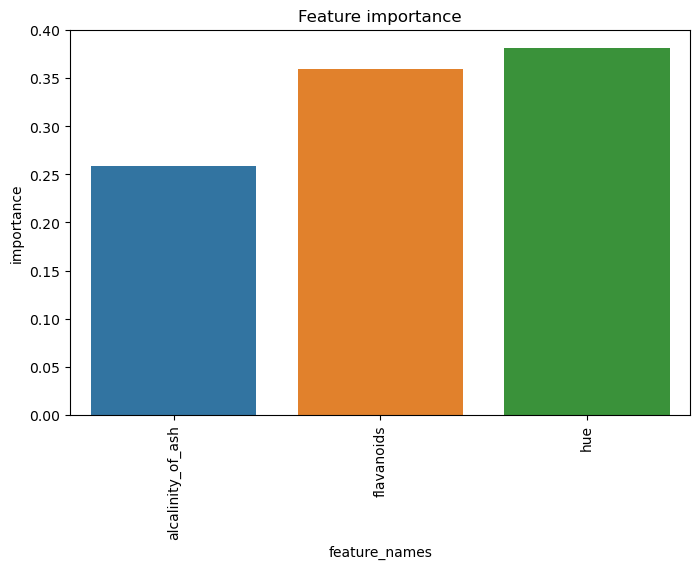

In [63]:
RandomForestClassifier()
y_pred = model.predict(X_test)
give_f_imp(model,X_train)

,n,train score,test score
0,4,0.600000,0.338462
1,9,0.755556,0.566667
2,14,0.985714,0.661538
3,19,0.978947,0.776923
4,24,0.991667,0.825641
5,29,0.986207,0.843590
6,34,0.976471,0.874359
7,39,0.984615,0.889744
8,44,0.977273,0.857692
9,49,0.995918,0.889744


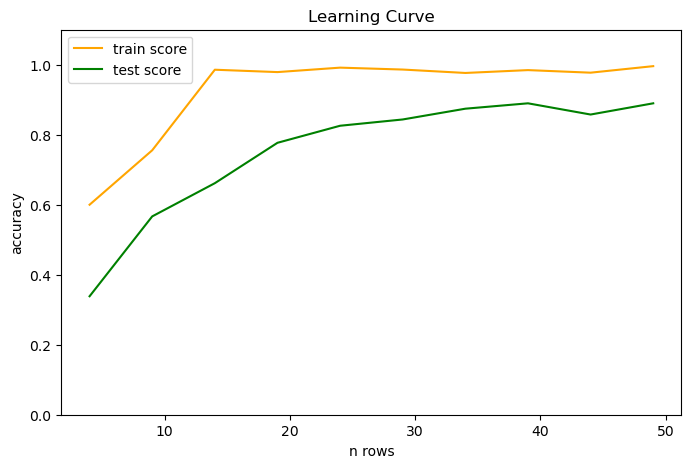

In [64]:
give_learning_curve(model,X_train,y_train,scoring=scoring)

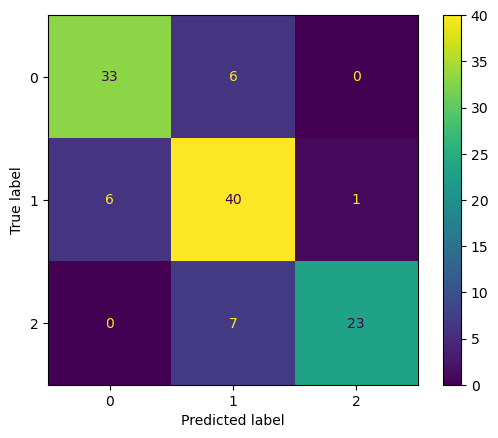

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.75      0.85      0.80        47
           2       0.96      0.77      0.85        30

    accuracy                           0.83       116
   macro avg       0.85      0.82      0.83       116
weighted avg       0.84      0.83      0.83       116



In [65]:
give_confusion_report(model,X_test,y_test)